<a href="https://colab.research.google.com/github/AndresPautrat/MachineLearning_UPC/blob/main/SKLearn_PCAg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
uploaded=files.upload()
import io
df=pd.read_csv(io.BytesIO(uploaded['iris.csv']))

Saving iris.csv to iris (2).csv


In [ ]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
features=['sepal.length', 'sepal.width', 'petal.length', 'petal.width']
X=df[features]
Y=df['variety']

In [ ]:
from sklearn.preprocessing import StandardScaler
X2=StandardScaler().fit_transform(X)
print(X2)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(2)#obtenemos2 componentes
componentes_principales=pca.fit_transform(X2)
df_PCA=pd.DataFrame(data=componentes_principales, columns=['PCA1','PCA2'])
print(df_PCA.tail(4))

         PCA1      PCA2
146  1.564580 -0.896687
147  1.521170  0.269069
148  1.372788  1.011254
149  0.960656 -0.024332


In [ ]:
df_PCA=pd.concat([df_PCA,df[['variety']]],axis=1)
print(df_PCA.head(10))

       PCA1      PCA2 variety
0 -2.264703  0.480027  Setosa
1 -2.080961 -0.674134  Setosa
2 -2.364229 -0.341908  Setosa
3 -2.299384 -0.597395  Setosa
4 -2.389842  0.646835  Setosa
5 -2.075631  1.489178  Setosa
6 -2.444029  0.047644  Setosa
7 -2.232847  0.223148  Setosa
8 -2.334640 -1.115328  Setosa
9 -2.184328 -0.469014  Setosa


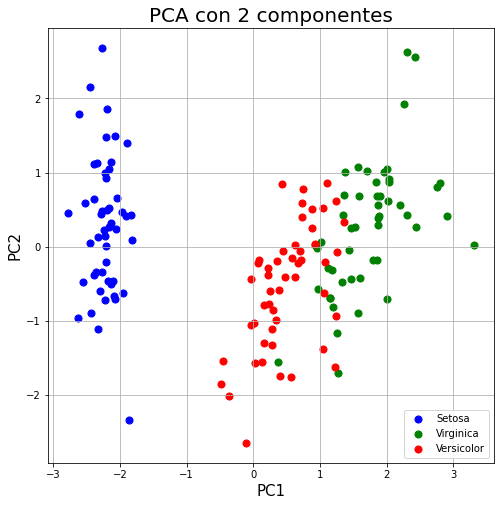

In [ ]:
import matplotlib.pyplot as plot

fig = plot.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("PC1", fontsize=15)
ax.set_ylabel("PC2", fontsize=15)
ax.set_title("PCA con 2 componentes", fontsize=20)
target = ['Setosa', 'Virginica', 'Versicolor']
colores = ['b', 'g', 'r']
for meta, color in zip(target, colores):
  indices_target = df_PCA['variety'] == meta
  ax.scatter( df_PCA.loc[indices_target, 'PCA1'], df_PCA.loc[indices_target, 'PCA2'], c=color, s=50 )
  ax.legend(target)
  ax.grid()



In [ ]:
Y

0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object